In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y = boston_data.target

## Decision Tree

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
X = df[['LSTAT']].values

In [51]:
tree = DecisionTreeRegressor(max_depth=5)

In [52]:
tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [53]:
sort_idx = X.flatten().argsort()

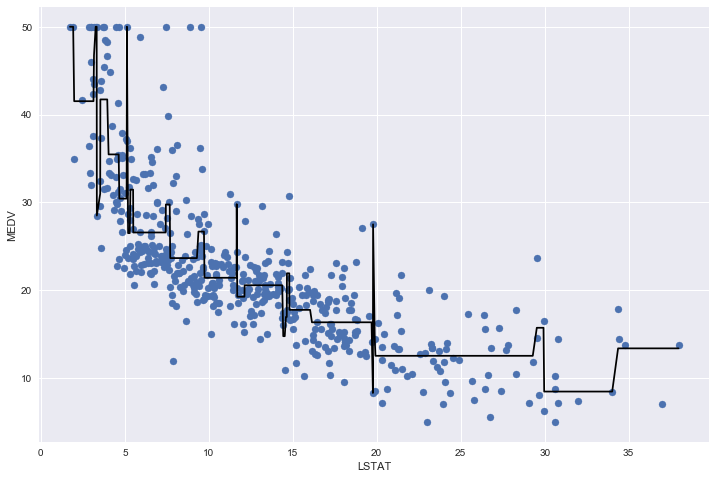

In [54]:
plt.figure(figsize=(12,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV')

The decision tree with a max_depth of 5 led to some serious overfitting. Reduce this parameter.

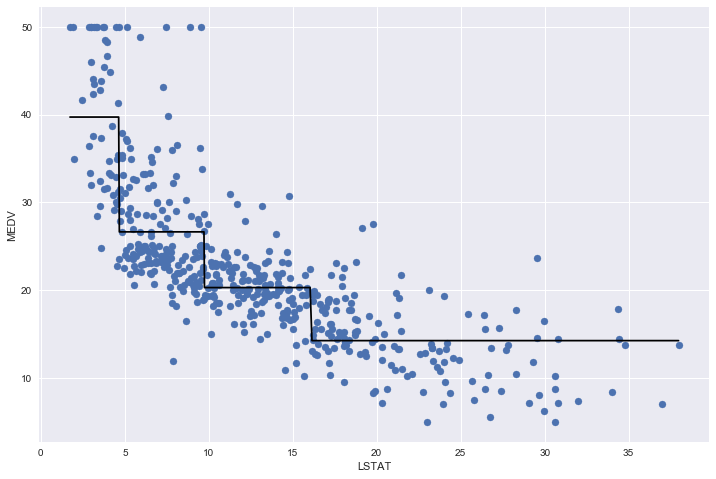

In [14]:
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X, y)
sort_idx = X.flatten().argsort()

plt.figure(figsize=(12,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV')

## Ensemble - Random Forest

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
X = df.values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
forest = RandomForestRegressor(n_estimators=500, criterion='mse', random_state=42, n_jobs=-1)

In [20]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [21]:
y_train_pred = forest.predict(X_train)

In [22]:
y_test_pred = forest.predict(X_test)

In [25]:
print("MSE train: {0:.4f}, test: {1:.4f}".format(
mean_squared_error(y_train, y_train_pred),
mean_squared_error(y_test, y_test_pred)
))

MSE train: 1.8712, test: 9.3994


In [26]:
print("R^2 train: {0:.4f}, test: {1:.4f}".format(
r2_score(y_train, y_train_pred),
r2_score(y_test, y_test_pred)
))

R^2 train: 0.9787, test: 0.8739


In [40]:
forest.feature_importances_

array([ 0.03036163,  0.001677  ,  0.0068441 ,  0.0012651 ,  0.01535587,
        0.40401012,  0.01400592,  0.06316796,  0.00461262,  0.01215806,
        0.0186434 ,  0.01276181,  0.41513641])

In [41]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [42]:
result = pd.DataFrame(forest.feature_importances_, df.columns)
result.columns = ['feature']

In [43]:
result.sort_values(by='feature', ascending=False)

,feature
LSTAT,0.415136
RM,0.404010
DIS,0.063168
CRIM,0.030362
PTRATIO,0.018643
NOX,0.015356
AGE,0.014006
B,0.012762
TAX,0.012158
INDUS,0.006844


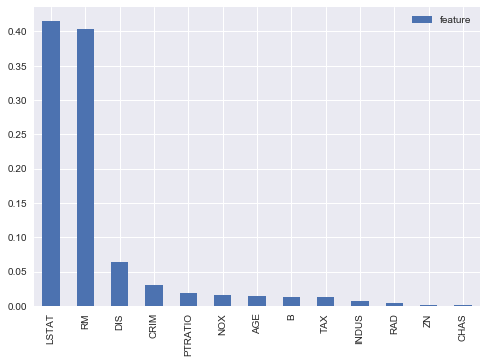

In [44]:
result.sort_values(by='feature', ascending=False).plot(kind='bar')

## Adaboost

In [27]:
from sklearn.ensemble import AdaBoostRegressor

In [28]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                       n_estimators=500, random_state=42)

In [29]:
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=500,
         random_state=42)

In [30]:
y_train_pred = ada.predict(X_train)

In [31]:
y_test_pred = ada.predict(X_test)

In [32]:
print("MSE train: {0:.4f}, test: {1:.4f}".format(
mean_squared_error(y_train, y_train_pred),
mean_squared_error(y_test, y_test_pred)
))

MSE train: 4.4864, test: 13.2099


In [33]:
print("R^2 train: {0:.4f}, test: {1:.4f}".format(
r2_score(y_train, y_train_pred),
r2_score(y_test, y_test_pred)
))

R^2 train: 0.9490, test: 0.8227


In [34]:
ada.feature_importances_

array([ 0.03380489,  0.00342185,  0.00904711,  0.00108256,  0.04181682,
        0.24254942,  0.00874274,  0.12358089,  0.01733797,  0.02265699,
        0.0392171 ,  0.02421406,  0.43252762])

In [35]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [36]:
result = pd.DataFrame(ada.feature_importances_, df.columns)
result.columns = ['feature']

In [38]:
result.sort_values(by='feature', ascending=False)

,feature
LSTAT,0.432528
RM,0.242549
DIS,0.123581
NOX,0.041817
PTRATIO,0.039217
CRIM,0.033805
B,0.024214
TAX,0.022657
RAD,0.017338
INDUS,0.009047


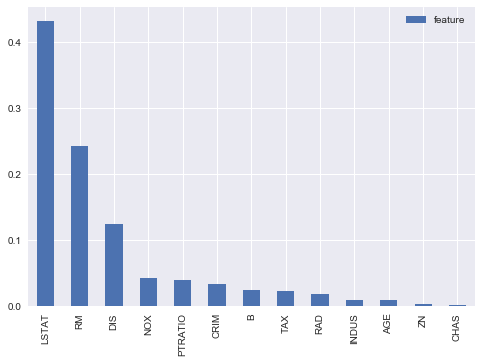

In [39]:
result.sort_values(by='feature', ascending=False).plot(kind='bar')